In [3]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Power spectrum')

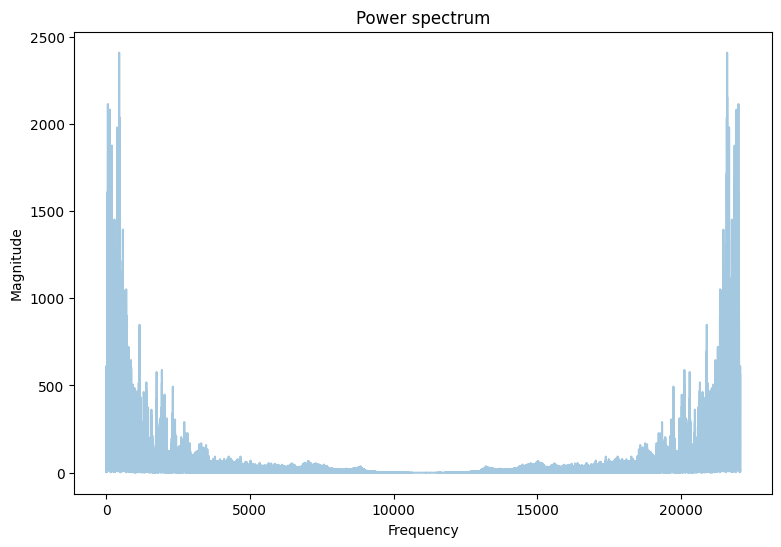

In [20]:
FIG_SIZE = (9, 6)
signal, sample_rate = librosa.load('./Data/genres_original/blues/blues.00000.wav', sr=22050)
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
f = np.linspace(0, sample_rate, len(magnitude))

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, magnitude, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

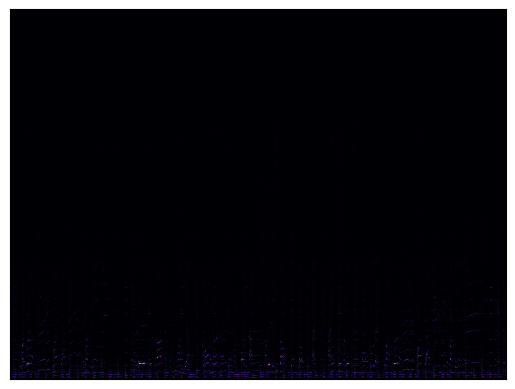

In [13]:
n_fft = 2048
hop_length = 512

n_fft_duration = n_fft/sample_rate
hop_length_duration = 512/sample_rate

stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, n_fft=n_fft, hop_length=hop_length)

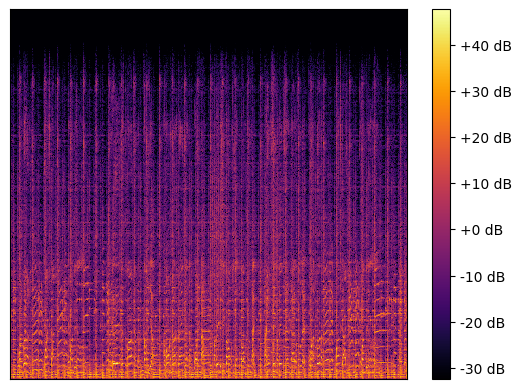

In [16]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, n_fft=n_fft, hop_length=hop_length)
plt.set_cmap(cmap='inferno')
plt.colorbar(format="%+2.0f dB")
plt.show()

## Preprocessing Steps

1. Load audio file
2. Compute STFT => Create Spectrogram
3. Extract MFCCs
4. Store MFCCs

In [29]:
import os
import json
import librosa
import math

BASE_DIR = os.path.dirname('./Data/genres_original/')
SAMPLE_RATE = 22050 # Hz
TRACK_DURATION = 30 # seconds
TOTAL_SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def compute_and_store_mfcc(dataset_path, output_path, n_fft=2048, hop_length=512, n_mfccs=13, num_segments=3):
    data = { # mapping[i] = 'genre' => label[j] = i => mfcc[i] 
        'mapping': [],
        'labels': [],
        'mfcc': [],
    }
    samples_per_segment = int(TOTAL_SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors = math.ceil(samples_per_segment/hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(BASE_DIR)):
        if dirpath is not BASE_DIR:
            label = dirpath.split('/')[-1]
            data['mapping'].append(label)
            print()
            print('='*10, f"Processing label : {label}", '='*10)
            try:
                for f in filenames:
                    # Process all files in filenames
                    filepath = os.path.join(dirpath, f)
                    signal, sr = librosa.load(filepath, sr=SAMPLE_RATE)
                    # Split the file into segments
                    for j in range(num_segments):
                        start = samples_per_segment * j
                        stop = start + samples_per_segment

                        mfcc = librosa.feature.mfcc(y=signal[start:stop], sr=SAMPLE_RATE, n_mfcc=n_mfccs, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        if len(mfcc) == num_mfcc_vectors:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(filepath, j+1))
            except:
                pass
                
    with open(output_path, "w") as fp:
        json.dump(data, fp, indent=4)
    
compute_and_store_mfcc(BASE_DIR, './output.json')
                    


========== Processing label : pop ==========
./Data/genres_original/pop/pop.00027.wav, segment:1
./Data/genres_original/pop/pop.00027.wav, segment:2
./Data/genres_original/pop/pop.00027.wav, segment:3
./Data/genres_original/pop/pop.00033.wav, segment:1
./Data/genres_original/pop/pop.00033.wav, segment:2
./Data/genres_original/pop/pop.00033.wav, segment:3
./Data/genres_original/pop/pop.00032.wav, segment:1
./Data/genres_original/pop/pop.00032.wav, segment:2
./Data/genres_original/pop/pop.00032.wav, segment:3
./Data/genres_original/pop/pop.00026.wav, segment:1
./Data/genres_original/pop/pop.00026.wav, segment:2
./Data/genres_original/pop/pop.00026.wav, segment:3
./Data/genres_original/pop/pop.00030.wav, segment:1
./Data/genres_original/pop/pop.00030.wav, segment:2
./Data/genres_original/pop/pop.00030.wav, segment:3
./Data/genres_original/pop/pop.00024.wav, segment:1
./Data/genres_original/pop/pop.00024.wav, segment:2
./Data/genres_original/pop/pop.00024.wav, segment:3
./Data/genres_orig